In [2]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import numpy as np

# Load the CSV file into a DataFrame
df = pd.read_csv('data/HR_data_2.csv')

(72, 71)
(235, 71)


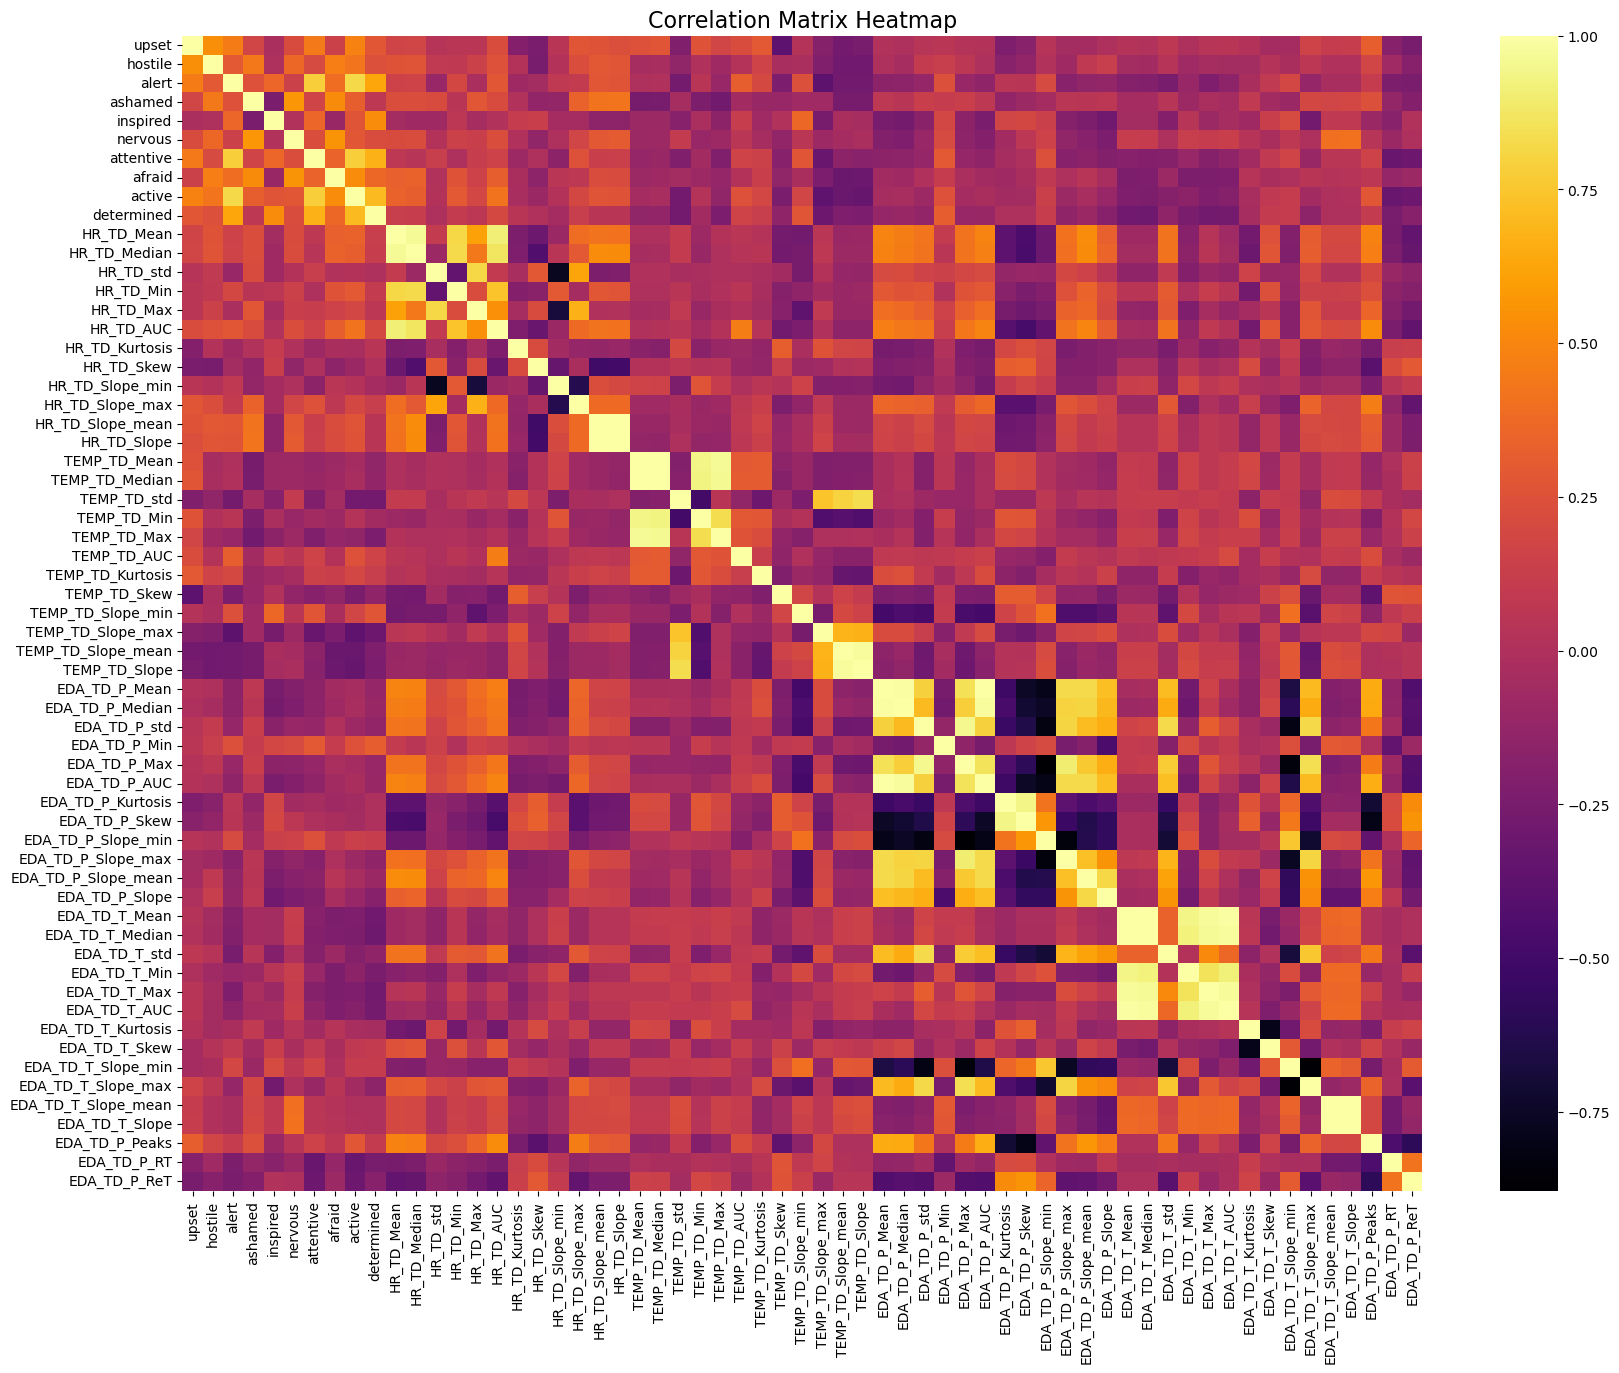

In [3]:
from sklearn.preprocessing import FunctionTransformer
from mpl_toolkits.mplot3d import Axes3D
df = df.dropna()
# Split the data into two cohorts: 'D1_2' and others
cohort_d1_2 = df[df['Cohort'] == 'D1_2']
cohort_others = df[df['Cohort'] != 'D1_2']
print(cohort_d1_2.shape)
print(cohort_others.shape)
# Select only numerical columns for correlation matrix
numerical_cols = cohort_d1_2.select_dtypes(include=['float64', 'int64']).columns
X = cohort_d1_2[numerical_cols]

# numerical_cols = cohort_others.select_dtypes(include=['float64', 'int64']).columns
# X = cohort_others[numerical_cols]

# Emotional columns (from your sample - adjust as needed)
emotional_cols = ['upset', 'hostile', 'alert', 'ashamed', 'inspired', 
                 'nervous', 'attentive', 'afraid', 'active', 'determined']

# Physiological columns to include (select those relevant for clustering)
physio_cols1 = ['HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std', 'TEMP_TD_Mean', 'TEMP_TD_Median', 'TEMP_TD_std']  # add others as needed
physio_cols2 = ['HR_TD_Mean', 'EDA_TD_P_Mean', 'TEMP_TD_Mean']  # add others as needed
physio_cols3 = ['HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min',
       'HR_TD_Max', 'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew',
       'HR_TD_Slope_min', 'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope',
       'TEMP_TD_Mean', 'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min',
       'TEMP_TD_Max', 'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew',
       'TEMP_TD_Slope_min', 'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean',
       'TEMP_TD_Slope', 'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std',
       'EDA_TD_P_Min', 'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis',
       'EDA_TD_P_Skew', 'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max',
       'EDA_TD_P_Slope_mean', 'EDA_TD_P_Slope', 'EDA_TD_T_Mean',
       'EDA_TD_T_Median', 'EDA_TD_T_std', 'EDA_TD_T_Min', 'EDA_TD_T_Max',
       'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis', 'EDA_TD_T_Skew',
       'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max', 'EDA_TD_T_Slope_mean',
       'EDA_TD_T_Slope', 'EDA_TD_P_Peaks', 'EDA_TD_P_RT', 'EDA_TD_P_ReT']
# Create feature matrix (combining emotional and physiological features)


X = X[emotional_cols + physio_cols3]

correlation_matrix = X.corr()


# Use a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='inferno', fmt=".2f", cbar=True)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

# K-means

c:\Users\tongt\miniconda3\envs\Sklearnextra\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tongt\miniconda3\envs\Sklearnextra\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\tongt\miniconda3\envs\Sklearnextra\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tongt\miniconda3\envs\Sklearnextra\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are l

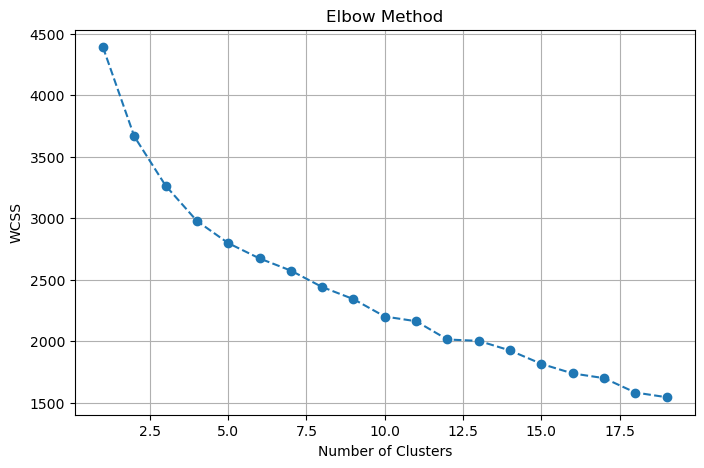

c:\Users\tongt\miniconda3\envs\Sklearnextra\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tongt\miniconda3\envs\Sklearnextra\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score: 0.152


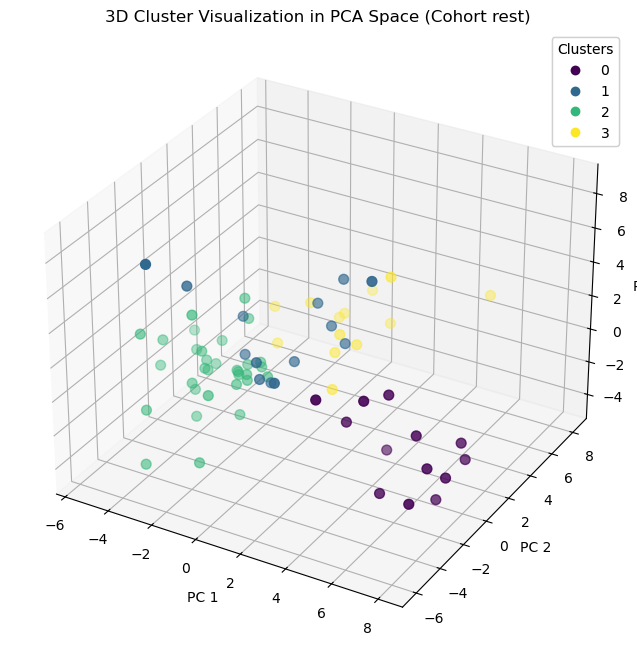

            upset   hostile     alert   ashamed  inspired   nervous  \
cluster                                                               
0        1.153846  1.000000  1.461538  1.153846  1.230769  1.000000   
1        1.285714  1.071429  1.785714  1.357143  2.357143  1.785714   
2        1.156250  1.000000  1.781250  1.093750  1.781250  1.250000   
3        2.153846  1.461538  3.615385  1.538462  2.230769  1.692308   

         attentive    afraid    active  determined  HR_TD_Mean  HR_TD_Median  \
cluster                                                                        
0         1.769231  1.000000  1.769231    2.153846   83.683697     83.213846   
1         2.642857  1.000000  2.071429    2.857143   76.929166     76.332500   
2         2.281250  1.000000  1.843750    2.406250   70.687718     68.898594   
3         4.307692  1.307692  4.153846    3.923077   80.596226     80.036923   

         HR_TD_std  EDA_TD_P_Mean  EDA_TD_P_Median  EDA_TD_P_std  \
cluster                 

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# --- Toggle between KMeans and KMedoids ---
use_kmedoids = False  # Set to False to use KMeans

# 1. Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 20), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# 2. Perform clustering (without PCA first)
optimal_k = 4  # You can change this after checking the elbow plot
if use_kmedoids:
    final_model = KMedoids(n_clusters=optimal_k, random_state=42, method='pam')
else:
    final_model = KMeans(n_clusters=optimal_k, random_state=42)
clusters = final_model.fit_predict(X_scaled)

# 3. Add cluster labels to the dataframe
X['cluster'] = clusters

# 4. Evaluate clustering
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# 5. Perform PCA (only for visualization)
from sklearn.decomposition import PCA

pca = PCA(n_components=3)  # Reduce to 3 components for 3D visualization
X_pca = pca.fit_transform(X_scaled)

# 6. 3D Visualization of clusters
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='viridis', s=50)
ax.set_title(f'3D Cluster Visualization in PCA Space (Cohort rest)')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
plt.show()

# 7. Analyze cluster characteristics
cluster_summary = X.groupby('cluster')[emotional_cols + physio_cols1].mean()
print(cluster_summary)
